In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# estilo do notebook
sns.set()

# url dos datasets
data = 'https://raw.githubusercontent.com/henriqueschaeff/projeto/main/heart_disease.csv'

# importar dataset da UCI
df = pd.read_csv(data)

# visualizar as primeiras 5 entradas
df.head()

,idade,sexo,dor_toracia,pressao_arterial_em_repouso,colesterol,acucar_sangue_jejum,resultado_eletro,fc_maxima,angina,depressao_seg_st,inclinacao_st_exercicio,numero_vasos_coloridos_fluoroscopia,teste_stress_talio,diagnostico_dc,fisioterapia,obito
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0,0.0,1
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0,1.0,0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0,1.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0,0.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0,0.0,0


In [ ]:
#0 - não há doença cardíaca
#1 - há doença cardíaca

In [3]:
df['diagnostico_dc'].unique()
df.loc[df.diagnostico_dc != 0, 'diagnostico_dc'] = 1
df.diagnostico_dc.value_counts()

0.0    109
1.0     90
Name: diagnostico_dc, dtype: int64

In [ ]:
#0 - paciente não teve atendimento fisioterapeutico
#1 - paciente  teve atendimento fisioterapeutico

In [4]:
df['fisioterapia'].unique()
df.loc[df.fisioterapia != 0, 'fisioterapia'] = 1
df.fisioterapia.value_counts()

1.0    173
0.0     26
Name: fisioterapia, dtype: int64

In [ ]:
#0 - paciente evoluiu bem
#1 - paciente evoluiu a óbito

In [5]:
df['obito'].unique()
df.loc[df.obito != 0, 'obito'] = 1
df.obito.value_counts()

0    176
1     23
Name: obito, dtype: int64

In [6]:
# criando uma cópia do dataframe
df_clean = df.copy()

# excluindo os valores ausentes
df_clean.dropna(subset = ['numero_vasos_coloridos_fluoroscopia'], inplace = True)
df_clean.dropna(subset = ['teste_stress_talio'], inplace = True)

# tamanho do novo dataframe
print('Número de entradas/pacientes:\t {}'.format(df_clean.shape[0]))
print('Número de variáveis/atributos pessoais e médicos:\t {}'.format(df_clean.shape[1]))

Número de entradas/pacientes:	 196
Número de variáveis/atributos pessoais e médicos:	 16


In [7]:
!pip install pywaffle --trusted-host artifactory.produbanbr.corp --index-url http://artifactory.produbanbr.corp/artifactory/api/pypi/pypi-all/simple

from pywaffle import Waffle

Looking in indexes: http://artifactory.produbanbr.corp/artifactory/api/pypi/pypi-all/simple


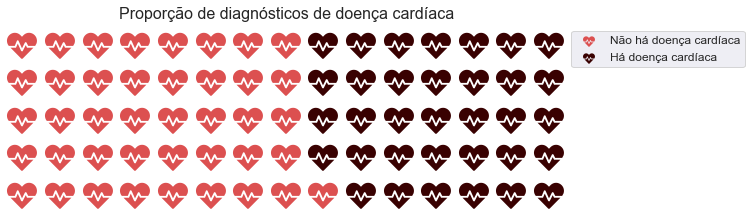

In [8]:
# instalando pacote waffle
!pip install pywaffle -q
from pywaffle import Waffle

# extrair value counts da variavel ocorrencia_classificacao
ddc = df_clean['diagnostico_dc'].value_counts().to_dict()

# plotar gráfico de waffle
fig = plt.figure(
                FigureClass=Waffle,
                rows=5,
                columns=15,
                colors=("#DC5050","#390101"),
                title={'label': 'Proporção de diagnósticos de doença cardíaca',  'fontsize': 16},
                values=ddc, icons='heartbeat', icon_size=30, labels=('Não há doença cardíaca','Há doença cardíaca'),
                legend={'loc': 'upper left', 'bbox_to_anchor': (1,1), 'fontsize': 12},
                icon_legend=True,
                figsize=(10,6))
fig.set_tight_layout(False)
plt.show();

In [9]:
print('Proporção de pacientes diagnosticados como não tendo doença cardíaca:\t {}%'.format(((df_clean['diagnostico_dc'].value_counts()[0]/df_clean.shape[0])*100).round(2)))
print('Proporção de pacientes diagnosticados como tendo doença cardíaca:\t {}%'.format(((df_clean['diagnostico_dc'].value_counts()[1]/df_clean.shape[0])*100).round(2)))

Proporção de pacientes diagnosticados como não tendo doença cardíaca:	 54.59%
Proporção de pacientes diagnosticados como tendo doença cardíaca:	 45.41%


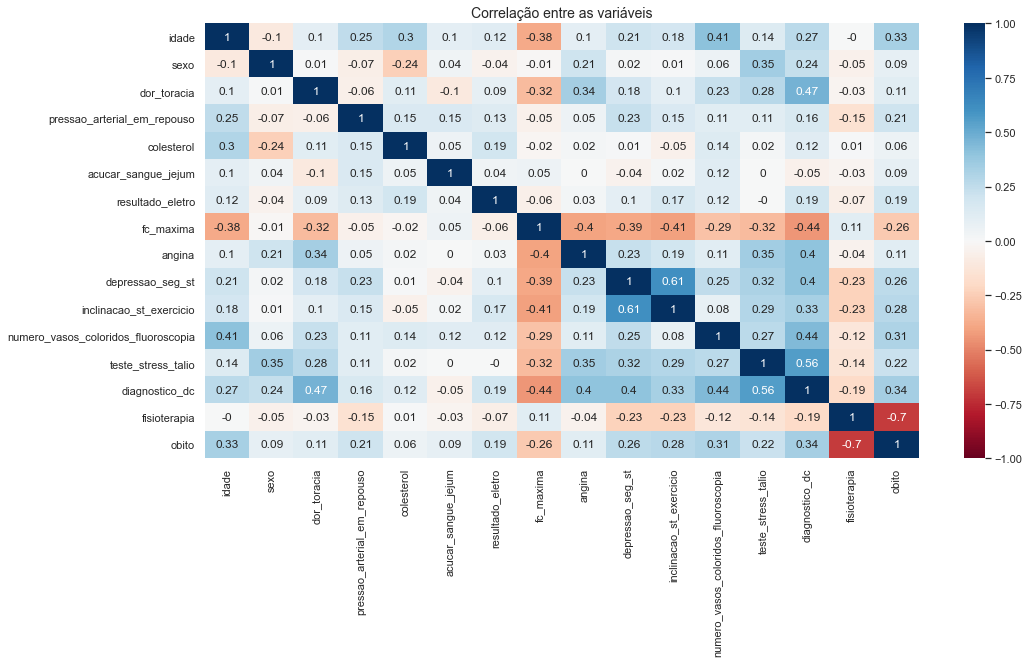

In [10]:
# heatmap (mapa de calor)
fig, ax = plt.subplots(figsize=(16,8))

corr = df_clean.corr().round(2)
sns.heatmap(corr, cmap='RdBu', linecolor='white', annot=True, ax=ax, vmin=-1.00, vmax= 1.00)
ax.set_title('Correlação entre as variáveis', fontsize=14)

plt.show();

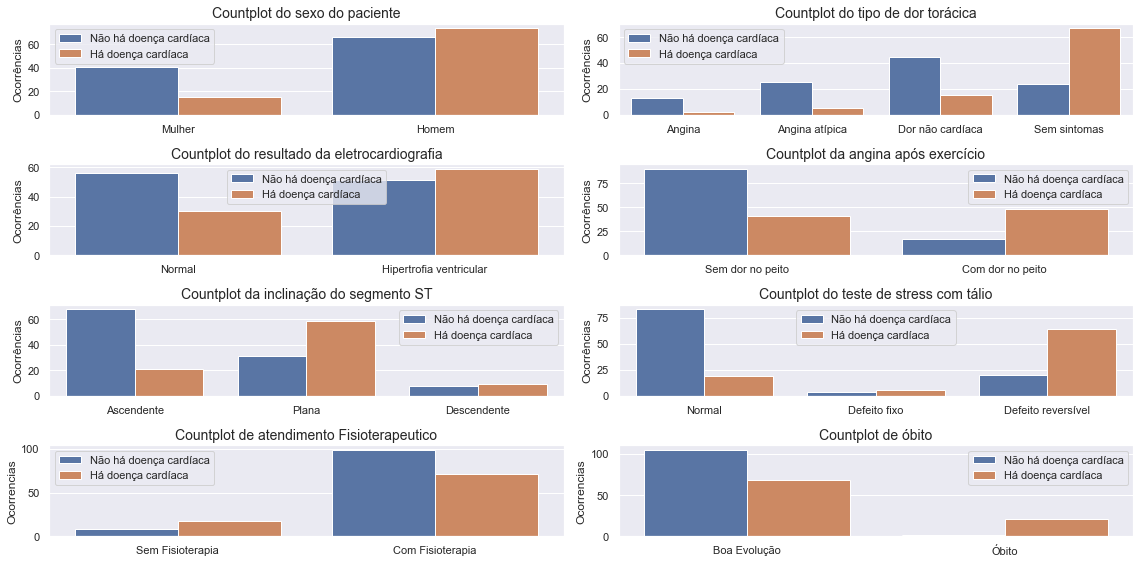

In [25]:
fig, ax = plt.subplots(nrows=4, ncols=2, figsize=(16,8))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# countplot sexo
sns.countplot(x='sexo', data=df_clean, hue='diagnostico_dc', ax=ax[0,0])
ax[0,0].set_xticklabels(['Mulher','Homem'])
ax[0,0].legend(['Não há doença cardíaca','Há doença cardíaca'])
ax[0,0].set_ylabel('Ocorrências', fontsize = 12)
ax[0,0].set_title('Countplot do sexo do paciente', fontsize=14)
ax[0,0].set_xlabel('')

# countplot cp
sns.countplot(x='dor_toracia', data=df_clean, hue='diagnostico_dc', ax=ax[0,1])
ax[0,1].set_xticklabels(['Angina','Angina atípica','Dor não cardíaca','Sem sintomas'])
ax[0,1].legend(['Não há doença cardíaca','Há doença cardíaca'])
ax[0,1].set_ylabel('Ocorrências', fontsize = 12)
ax[0,1].set_title('Countplot do tipo de dor torácica', fontsize=14)
ax[0,1].set_xlabel('')

# countplot restecg
sns.countplot(x='resultado_eletro', data=df_clean, hue='diagnostico_dc', ax=ax[1,0])
ax[1,0].set_xticklabels(['Normal','Hipertrofia ventricular'])
ax[1,0].legend(loc='upper center',labels=['Não há doença cardíaca','Há doença cardíaca'])
ax[1,0].set_ylabel('Ocorrências', fontsize = 12)
ax[1,0].set_title('Countplot do resultado da eletrocardiografia', fontsize=14)
ax[1,0].set_xlabel('')

# countplot exang 
sns.countplot(x='angina', data=df_clean, hue='diagnostico_dc', ax=ax[1,1])
ax[1,1].set_xticklabels(['Sem dor no peito','Com dor no peito'])
ax[1,1].legend(['Não há doença cardíaca','Há doença cardíaca'])
ax[1,1].set_ylabel('Ocorrências', fontsize = 12)
ax[1,1].set_title('Countplot da angina após exercício', fontsize=14)
ax[1,1].set_xlabel('')

# countplot slope 
sns.countplot(x='inclinacao_st_exercicio', data=df_clean, hue='diagnostico_dc', ax=ax[2,0])
ax[2,0].set_xticklabels(['Ascendente','Plana','Descendente'])
ax[2,0].legend(['Não há doença cardíaca','Há doença cardíaca'])
ax[2,0].set_ylabel('Ocorrências', fontsize = 12)
ax[2,0].set_title('Countplot da inclinação do segmento ST', fontsize=14)
ax[2,0].set_xlabel('')

# countplot thal 
sns.countplot(x='teste_stress_talio', data=df_clean, hue='diagnostico_dc', ax=ax[2,1])
ax[2,1].set_xticklabels(['Normal','Defeito fixo','Defeito reversível'])
ax[2,1].legend(['Não há doença cardíaca','Há doença cardíaca'])
ax[2,1].set_ylabel('Ocorrências', fontsize = 12)
ax[2,1].set_title('Countplot do teste de stress com tálio', fontsize=14)
ax[2,1].set_xlabel('')


#countplot fisio
sns.countplot(x='fisioterapia', data=df_clean, hue='diagnostico_dc', ax=ax[3,0])
ax[3,0].set_xticklabels(['Sem Fisioterapia', 'Com Fisioterapia'])
ax[3,0].legend(['Não há doença cardíaca', 'Há doença cardíaca'])
ax[3,0].set_ylabel('Ocorrencias', fontsize =12)
ax[3,0].set_title('Countplot de atendimento Fisioterapeutico', fontsize=14)
ax[3,0].set_xlabel('')

fig.tight_layout();

#countplot fisio
sns.countplot(x='obito', data=df_clean, hue='diagnostico_dc', ax=ax[3,1])
ax[3,1].set_xticklabels(['Boa Evolução', 'Óbito'])
ax[3,1].legend(['Não há doença cardíaca', 'Há doença cardíaca'])
ax[3,1].set_ylabel('Ocorrencias', fontsize =12)
ax[3,1].set_title('Countplot de óbito', fontsize=14)
ax[3,1].set_xlabel('')

fig.tight_layout();

In [26]:
# importando pacotes

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score

In [27]:
# separando variáveis explicativas e dependente
X = df_clean.drop(['diagnostico_dc','acucar_sangue_jejum'], axis = 1)
y = df_clean['diagnostico_dc']

# conjunto de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=50)

# criando e estimando o modelo
ml_model = LogisticRegression(solver='liblinear')
ml_model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [28]:
 #calculando y previsto e probabilidade do y previsto
y_pred = ml_model.predict(X_test)
y_prob = ml_model.predict_proba(X_test)

# exibindo valores
print("y_pred: \n", y_pred[0:2])
print("\ny_prob: \n", y_prob[0:2])

y_pred: 
 [0. 1.]

y_prob: 
 [[0.78745542 0.21254458]
 [0.00773807 0.99226193]]


In [29]:
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))
 
# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))
 
# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test,y_prob[:,1])))

Relatório de Classificação:
               precision    recall  f1-score   support

         0.0     0.8333    0.9375    0.8824        16
         1.0     0.9545    0.8750    0.9130        24

    accuracy                         0.9000        40
   macro avg     0.8939    0.9062    0.8977        40
weighted avg     0.9061    0.9000    0.9008        40

Acurácia: 0.9000

AUC: 0.9505



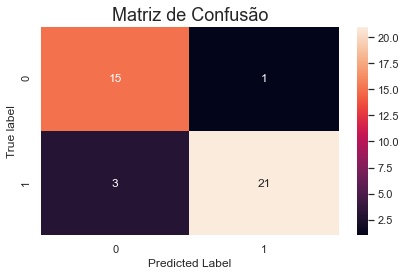

In [30]:
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax=ax)

ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")

plt.tight_layout()

In [31]:
X.columns

Index(['idade', 'sexo', 'dor_toracia', 'pressao_arterial_em_repouso',
       'colesterol', 'resultado_eletro', 'fc_maxima', 'angina',
       'depressao_seg_st', 'inclinacao_st_exercicio',
       'numero_vasos_coloridos_fluoroscopia', 'teste_stress_talio',
       'fisioterapia', 'obito'],
      dtype='object')

In [39]:
idade = 27.0
sexo = 1.0
dor_toracia = 4.0
pressao_arterial_em_repouso = 110.0
colesterol = 52.0
resultado_eletro = 0.0
fc_maxima = 150.0
angina = 0.0
depressao_seg_st = 1.0
inclinacao_st_exercicio = 0.0
numero_vasos_coloridos_fluoroscopia = 0.0
teste_stress_talio = 0.0
fisioterapia = 1.0
obito = 0.0
entrada = [[idade, sexo, dor_toracia, pressao_arterial_em_repouso, colesterol, resultado_eletro, fc_maxima, angina, depressao_seg_st, inclinacao_st_exercicio, numero_vasos_coloridos_fluoroscopia, teste_stress_talio, fisioterapia, obito]]

print('Previsão: {}'.format(ml_model.predict(entrada)[0]))

Previsão: 0.0


In [40]:
ml_model.predict_proba(entrada)

array([[0.90475919, 0.09524081]])

In [47]:
# Importando bibliotecas
from ipywidgets import widgets, HBox, VBox, Layout, Label
from IPython.display import  display
style = {'description_width': '150px'}
style1 = {'description_width': '210px'}
style2 = {'description_width': '230px'}
layout = {'width': '400px'}

# Criando os controles do formulário
idade = widgets.Text(description="Idade (anos):", style=style, layout=layout)

sexo = widgets.RadioButtons(
    options=[('Homem', 1), ('Mulher', 0)],
    description='Sexo:',
    disabled=False, style=style
)

dor_toracia = widgets.RadioButtons(
    options=[('Angina', 1), ('Angina atípica', 2),('Dor não cardíaca', 3), ('Sem sintomas', 4)],
    description='Tipo de dor torácica:',
    disabled=False, style=style
)

pressao_arterial_em_repouso = widgets.Text(description="Pressão arterial (mm/Hg):", style=style, layout=layout)

colesterol = widgets.Text(description="Colesterol (mg/dl):", layout=layout, style=style)

resultado_eletro = widgets.RadioButtons(
    options=[('Normal', 0), ('Anormalidade do ST-T', 1),('Hipertrofia ventricular', 2)],
    description='Eletrocardiografia:',
    disabled=False, style=style, layout=layout
)

fc_maxima = widgets.Text(description="Frequência cardíaca (bpm):" , style=style1, layout=layout)

angina = widgets.RadioButtons(
    options=[('Não', 0), ('Sim', 1)],
    description='Angina após exercício:',
    disabled=False, style=style, layout=layout
)

depressao_seg_st = widgets.Text(description="Depressão do Segmento ST (mm):", style=style1, layout=layout)

inclinacao_st_exercicio = widgets.RadioButtons(
    options=[('Ascendente', 1), ('Plana', 2), ('Descendente',3)],
    description='Inclinação do segmento ST-T:',
    disabled=False , style=style1, layout=layout
)
numero_vasos_coloridos_fluoroscopia = widgets.Text(description="Vasos color. por fluoroscopia (quant.):", style=style2, layout=layout)

teste_stress_talio = widgets.RadioButtons(
    options=[('Normal', 3), ('Defeito fixo', 6), ('Defeito reversível',7)],
    description='Teste de stress cardíaco:',
    disabled=False, style=style
)

fisioterapia = widgets.RadioButtons(
    options=[('Não', 0), ('Sim', 1)],
    description='Atendimento Fisioterapeutico:',
    disabled=False, style=style1, layout=layout

)

obito = widgets.RadioButtons(
    options=[('Não', 0), ('Sim', 1)],
    description='Obito:',
    disabled=False, style=style1, layout=layout

)
botao = widgets.Button(description="Simular") 

left = VBox([idade, pressao_arterial_em_repouso, colesterol,fc_maxima, depressao_seg_st, numero_vasos_coloridos_fluoroscopia, inclinacao_st_exercicio, fisioterapia, obito], layout=Layout(width='50%'))
right = VBox([sexo, angina, teste_stress_talio, dor_toracia, resultado_eletro])
inputs = HBox([left, right])


# Função de simulação
def simulador(sender):
    entrada=[[
                float(idade.value if idade.value else 0), 
                float(sexo.value if sexo.value else 0), 
                float(dor_toracia.value if dor_toracia.value else 0), 
                float(pressao_arterial_em_repouso.value if pressao_arterial_em_repouso.value else 0), 
                float(colesterol.value if colesterol.value else 0), 
                float(resultado_eletro.value if resultado_eletro.value else 0),
                float(fc_maxima.value if fc_maxima.value else 0), 
                float(angina.value if angina.value else 0), 
                float(depressao_seg_st.value if depressao_seg_st.value else 0), 
                float(inclinacao_st_exercicio.value if inclinacao_st_exercicio.value else 0), 
                float(numero_vasos_coloridos_fluoroscopia.value if numero_vasos_coloridos_fluoroscopia.value else 0), 
                float(teste_stress_talio.value if teste_stress_talio.value else 0),
                float(fisioterapia.value if fisioterapia.value else 0),
                float(obito.value if obito.value else 0)
             ]]
    valor = ml_model.predict(entrada)[0]
    if valor == 0:
      diagn =  'Sem diagnóstico de doença cardiovascular.'
    else:
      diagn = 'Com diagnóstico de doença cardiovascular.'
    print('Previsão: {}\n'.format(diagn))
    print('Probabilidade: {}%'.format(float(((ml_model.predict_proba(entrada)[:,valor])*100).round(3))))
# Atribuindo a função "simulador" ao evento click do botão
botao.on_click(simulador)    

In [48]:
display(inputs, botao)

Button(description='Simular', style=ButtonStyle())